## The data consist of all the information of a restaurent such as bill, tip, sex, smoker etc. and we would be using Linear Regression Model to analyze the given data.

#### Importing different libraries such as numpy, pandas, matplotlib and seaborn.

In [1]:
import numpy as np
import pandas as pd

## for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


#### info() method is used to see all the information about the dataset.

In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


#### In this describe is used to get the percentiles so that outliers can be identified.

In [5]:
tips.describe(percentiles = [0.8,0.9,0.95,0.99,1]).T

,count,mean,std,min,50%,80%,90%,95%,99%,100%,max
total_bill,244.0,19.785943,8.902412,3.07,17.795,26.098,32.235,38.0610,48.2270,50.81,50.81
tip,244.0,2.998279,1.383638,1.00,2.900,4.000,5.000,5.1955,7.2145,10.00,10.00
size,244.0,2.569672,0.951100,1.00,2.000,3.000,4.000,4.0000,6.0000,6.00,6.00


#### During outlier treatment the top and outliers are identified, it can be top 1% and bottom 1%, top 5% and bottom 5% and so on depending on the requirement.

#### In this case we are going for top 5% and bottom 5%.

In [7]:
lower_cutoff = tips.tip.quantile(0.05)

In [8]:
upper_cutoff = tips.tip.quantile(0.95)

In [9]:
tips['tip'] = tips.tip.clip(lower_cutoff, upper_cutoff)

In [10]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.8100
tip,244.0,2.932219,1.133096,1.44,2.0000,2.900,3.5625,5.1955
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.0000


#### df.clip() is used to trim off the decided lower and upper cutoff. It does not drop the rows that are outside the specified range by the upper and lower values. Instead, if a value is outside the boundaries, the clip function makes them equal to the appropriate boundary value. 

In [11]:
def outlier_treatment(x):
    lower = x.quantile(0.05)
    upper = x.quantile(0.95)
    
    return x.clip(lower, upper)

In [12]:
tips['total_bill'] = outlier_treatment(tips.total_bill)

In [13]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.598076,7.961556,9.5575,13.3475,17.795,24.1275,38.0610
tip,244.0,2.932219,1.133096,1.4400,2.0000,2.900,3.5625,5.1955
size,244.0,2.569672,0.951100,1.0000,2.0000,2.000,3.0000,6.0000


#### As the outliers are treated, then we go for EDA(Exploratory Data Analysis)

In [17]:
tips_continuous = tips.select_dtypes('number')

In [21]:
tips_continuous.head(2)

,total_bill,tip,size
0,16.99,1.44,2
1,10.34,1.66,3


In [20]:
tips_categorical = tips.select_dtypes('category')

In [22]:
tips_categorical.head(2)

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner


#### Univariate Analysis is the simplest form of analysing data. It is used for the analysis of a single column or variable.


#### To see the distribution of the columns for univariate analysis.
 
 We can plot:
 - Histogram
 - Boxplots

In [23]:
def univariate_continuous(x):
    
    print('Analysis for', x.name)
    x.hist()
    plt.ylabel('Frequency')
    plt.xlabel(x.name)
    plt.show()

Analysis for total_bill


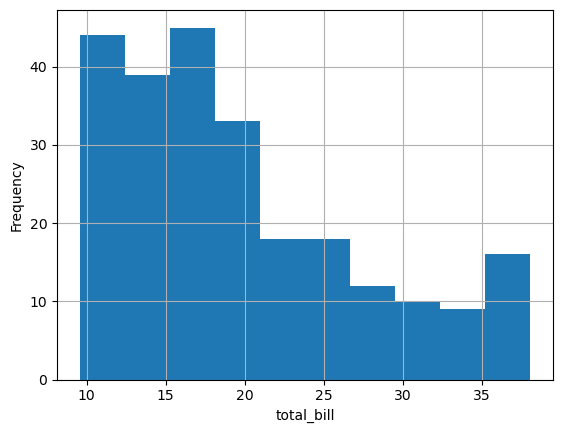

Analysis for tip


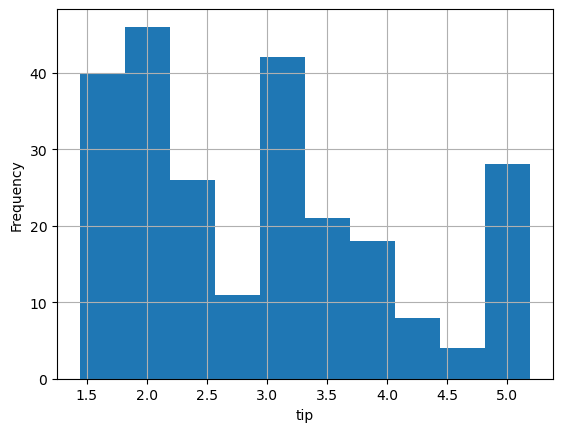

Analysis for size


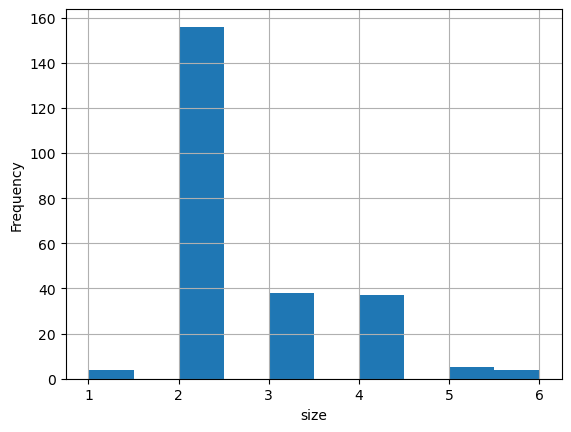

total_bill    None
tip           None
size          None
dtype: object

In [24]:
tips_continuous.apply(univariate_continuous)

#### Bivariate Analysis

- Continuous  vs Continuous

In [25]:
tips_continuous.corr()

,total_bill,tip,size
total_bill,1.000000,0.653489,0.604297
tip,0.653489,1.000000,0.502207
size,0.604297,0.502207,1.000000


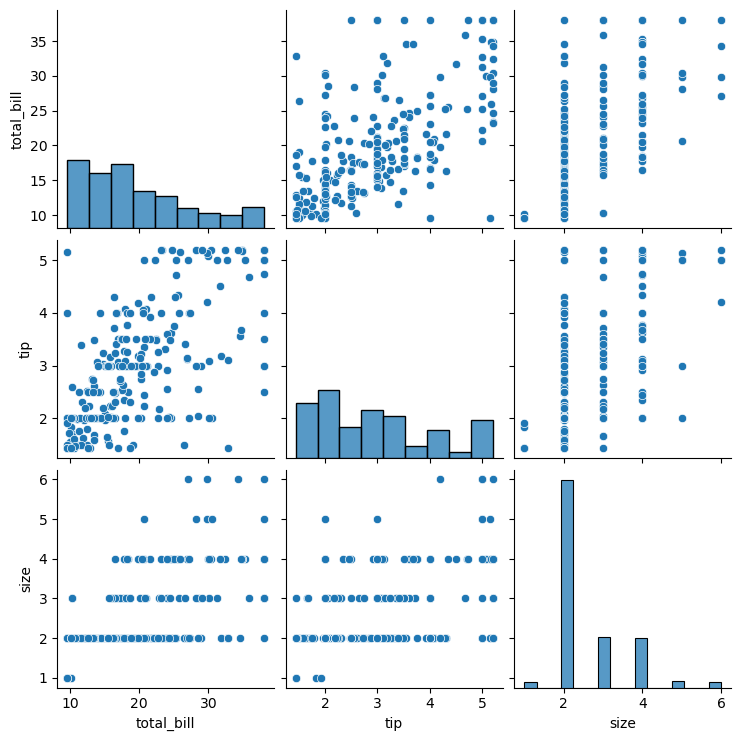

In [26]:
sns.pairplot(tips_continuous)

In [28]:
tips.sex

0      Female
1        Male
2        Male
3        Male
4      Female
        ...  
239      Male
240    Female
241      Male
242      Male
243    Female
Name: sex, Length: 244, dtype: category
Categories (2, object): ['Male', 'Female']

In [29]:
tips.tip

0      1.4400
1      1.6600
2      3.5000
3      3.3100
4      3.6100
        ...  
239    5.1955
240    2.0000
241    2.0000
242    1.7500
243    3.0000
Name: tip, Length: 244, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='tip'>

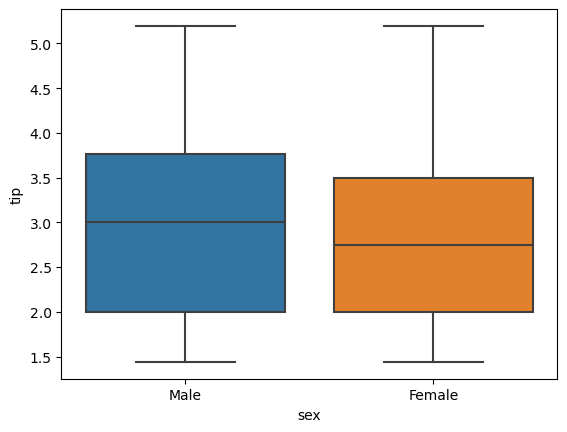

In [30]:
sns.boxplot(x = tips.sex, y = tips.tip)

#### From the above boxplot, males give a bit more tip than females.

#### Now creating a formula to create a chart between categorical columns(sex,smoker,day,time) and tips.

In [31]:
def cat_vs_tip(x):
    print('Analysis for',x.name)
    sns.boxplot(x=x,y=tips.tip)
    plt.show()

Analysis for sex


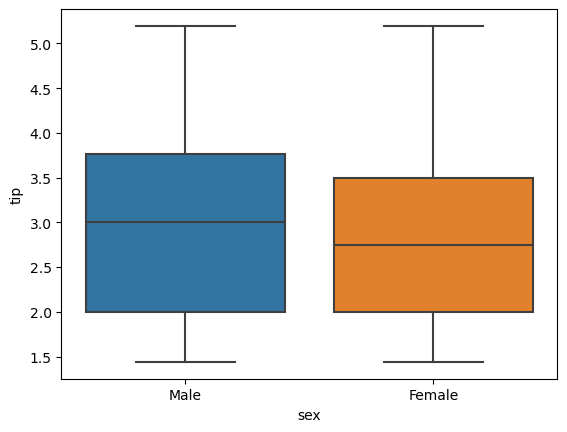

Analysis for smoker


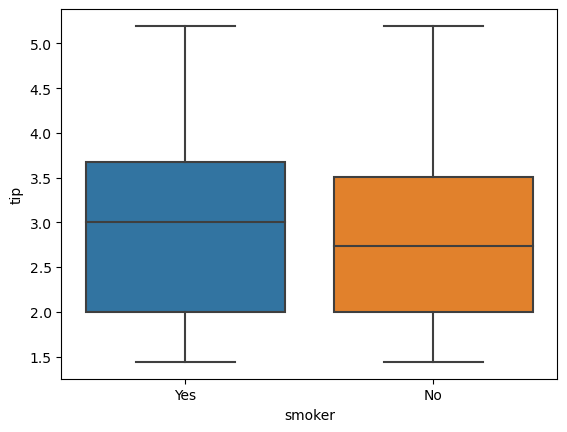

Analysis for day


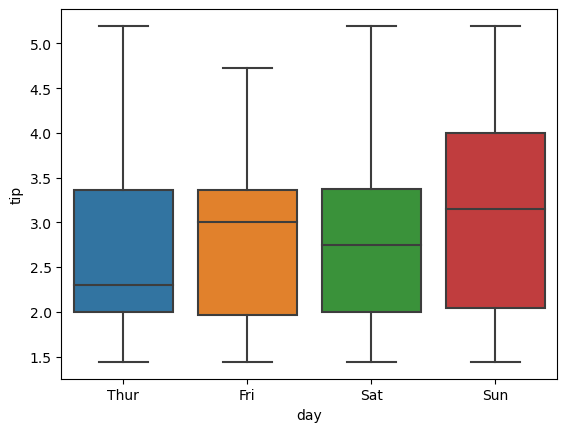

Analysis for time


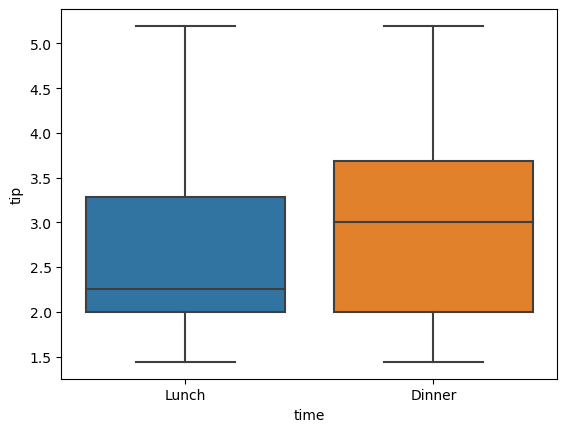

sex       None
smoker    None
day       None
time      None
dtype: object

In [32]:
tips_categorical.apply(cat_vs_tip)

#### From the above given boxplots;

The Insights are:

- Smoker pay a bit higher tip than non-smokers.

- In all the days, people tend to give the most tips on Sunday.

- Most tips are given at dinner time.

#### sklearn

#### Scikit-Learn or sklearn is a python library, used to implement machine learning models and statistical models.

#### from sklearn we have imported test_train_split

In [36]:
from sklearn.model_selection import train_test_split

#### The test_train_split from sklearn is used to divide the data into training data and testing data, so that if a model is made on training data, than it could also be used on testing data to judge the model's accuracy.

#### In this case 20% data has been taken into testing data so automatically the rest would have went in training data.

In [38]:
tips_train, tips_test = train_test_split(tips, test_size = 0.2)

In [39]:
tips_train.shape

(195, 7)

In [40]:
tips_test.shape

(49, 7)

#### Dividing the data into qualitative and quantitative data types.

In [41]:
tips.select_dtypes('category')

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


#### By using pd.get_dummies the categorical data would create one-hot-encoding, and would create the categorical data into 0 and 1, because in machine-learning models, the machine can only identify 0 and 1, it can't identify any word as such,

In [42]:
pd.get_dummies(tips.select_dtypes('category')).head(2)

,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,0,1,0,1,0,0,0,1,0,1
1,1,0,0,1,0,0,0,1,0,1


#### In here the drop_first is used it is used to drop the first column after one-hot-encoding it.

In [48]:
tips_cat_one_hot = pd.get_dummies(tips.select_dtypes('category'),drop_first = True)

In [44]:
tips_num = tips.select_dtypes('number')

In [45]:
tips_final = pd.concat([tips_cat_one_hot, tips_num], axis = 1)

In [46]:
tips_final.head(2)

,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner,total_bill,tip,size
0,1,1,0,0,1,1,16.99,1.44,2
1,0,1,0,0,1,1,10.34,1.66,3


In [49]:
tips_train, tips_test = train_test_split(tips_final, test_size = 0.2, random_state = 0)

In [50]:
tips_train.shape

(195, 9)

In [51]:
tips_train.shape

(195, 9)

#### Linear Regression
-- To figure out the line of best fit it will try to optimize the cost function which in this case is sum of squared errors.

In [52]:
tips.total_bill

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [53]:
tips.tip

0      1.4400
1      1.6600
2      3.5000
3      3.3100
4      3.6100
        ...  
239    5.1955
240    2.0000
241    2.0000
242    1.7500
243    3.0000
Name: tip, Length: 244, dtype: float64

#### Creating a scatterplot to see the relationship between tip and total bill.

C:\Users\n\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

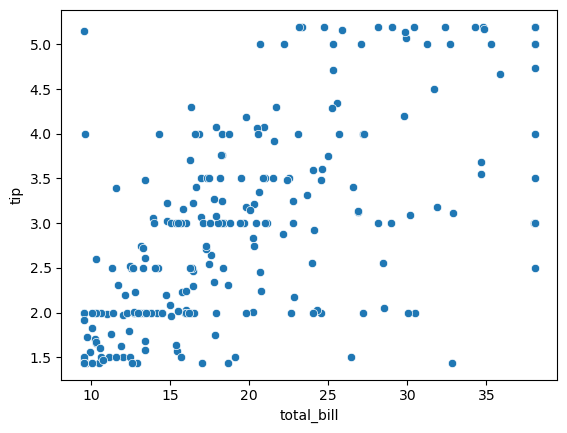

In [54]:
sns.scatterplot(tips.total_bill, tips.tip)

#### From the graph it can easily be seen that tip and total_bill have a linear relationship.

In [55]:
import statsmodels.formula.api as smf

In [58]:
list(tips_train.columns)

['sex_Female',
 'smoker_No',
 'day_Fri',
 'day_Sat',
 'day_Sun',
 'time_Dinner',
 'total_bill',
 'tip',
 'size']

In [59]:
' + '.join(list( tips_train.columns ))

'sex_Female + smoker_No + day_Fri + day_Sat + day_Sun + time_Dinner + total_bill + tip + size'

In [60]:
formula1 = 'tip~sex_Female + smoker_No + day_Fri + day_Sat + day_Sun + time_Dinner + total_bill + tip + size'

In [61]:
model = smf.ols(formula1,tips_train)

In [63]:
model = model.fit()

R squared value:
% of error explained by the best fit line over and above the naive prediction

Mean = SST
Regression line = SSR
Total benefit of the model = SST - SSR

R2 = (SST - SSR)/SST

SST = Sum of squared error.
SSR = Sum of squared regression.

In [64]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.202e+28
Date:                Thu, 03 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:40:26   Log-Likelihood:                 5766.6
No. Observations:                 195   AIC:                        -1.151e+04
Df Residuals:                     185   BIC:                        -1.148e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.498e-15   1.05e-14     -0.237      

#### From the above model it can be seen that the Female sex does not affect the tip. So we have to remove the Female sex and create a new formula that does not involve Female sex.

In [68]:
formula2 = 'tip~smoker_No + day_Fri + day_Sat + day_Sun + time_Dinner + total_bill + size'

In [69]:
model1 = smf.ols(formula2, tips_train)

In [70]:
model1 = model1.fit()

In [89]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     20.30
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           3.76e-20
Time:                        20:48:35   Log-Likelihood:                -246.55
No. Observations:                 195   AIC:                             509.1
Df Residuals:                     187   BIC:                             535.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.9515      0.237      4.015      

#### From the above model, it can be seen that the other attributes such as Smoker, Day and Dinner time doesn't give any such relevance, so a new formula would be created in which total bill and size would be used.

In [79]:
formula3 = 'tip~total_bill + size'

In [95]:
model2 = smf.ols(formula3,tips_train)

In [96]:
model2 = model2.fit()

In [97]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     69.26
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           2.25e-23
Time:                        20:51:25   Log-Likelihood:                -248.70
No. Observations:                 195   AIC:                             503.4
Df Residuals:                     192   BIC:                             513.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9131      0.193      4.728      0.0

In [109]:
train_predictions = model2.predict(tips_train)

In [110]:
tips_train.tip

7      3.1200
83     5.0000
176    2.0000
106    4.0600
156    5.0000
        ...  
67     1.4400
192    2.5600
117    1.5000
47     5.1955
172    5.1500
Name: tip, Length: 195, dtype: float64

In [111]:
##Predictions:Test_data

tips_test.tip

64     2.6400
63     3.7600
55     3.5100
111    1.4400
225    2.5000
92     1.4400
76     3.0800
181    5.1955
188    3.5000
180    3.6800
73     5.0000
107    4.2900
150    2.5000
198    2.0000
224    1.5800
44     5.1955
145    1.5000
110    3.0000
243    3.0000
189    4.0000
210    2.0000
104    4.0800
138    2.0000
8      1.9600
199    2.0000
203    2.5000
220    2.2000
125    4.2000
5      4.7100
22     2.2300
74     2.2000
124    2.5200
12     1.5700
168    1.6100
45     3.0000
158    2.6100
37     3.0700
136    2.0000
212    5.1955
223    3.0000
222    1.9200
118    1.8000
231    3.0000
155    5.1400
209    2.2300
18     3.5000
108    3.7600
15     3.9200
71     3.0000
Name: tip, dtype: float64

In [112]:
test_predictions = model2.predict(tips_test)

In [104]:
tips_test.tip.head(2)

64    2.64
63    3.76
Name: tip, dtype: float64

#### from sklearn library we have imported the metrics to calculate the errors.

In [105]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

In [113]:
mean_absolute_percentage_error(tips_train.tip, train_predictions)

0.26441696632653966

In [ ]:
#### So in case of train data, we can see that the absolute percentage error is 0.26.

In [114]:
mean_absolute_percentage_error(tips_test.tip, test_predictions)

0.1990957765713758

In [ ]:
#### In case of test data, we see that the absolute percentage error is 0.19.